In [7]:
from influxdb_client import InfluxDBClient
from influxdb_client.client.exceptions import InfluxDBError

import datetime
import os, csv
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

root_folder = os.getcwd()
config_folder = os.path.join(root_folder, "config")
template_folder = os.path.join(root_folder, "template")
data_folder = os.path.join(root_folder, "data")

connection_file = os.path.join(config_folder, "connection.ini")

db_data_name = "p"

In [8]:

_template = '%Y-%m-%d %H:%M:%S'
_start = datetime.datetime.strptime('2026-01-17 00:00:00', _template)
_stop  = datetime.datetime.strptime('2026-01-18 23:59:59', _template)

_delay = int(100*(_stop - _start).total_seconds() / 3600)

_delay

4799

In [9]:
param = {
    "_start": _start,
    "_stop": _stop
}

db_data = None 

flux_filename = os.path.join(template_folder, f"{db_data_name}.flux")

if os.path.exists(flux_filename):
    
    print(f"load {flux_filename}")
    
    lf = '\n'
    with open(flux_filename, "r") as f:
        db_query = "".join(f.readlines()).replace(lf, '').strip()



load c:\Develop\py\fluidxlab\one\arima\template\p.flux
load c:\Develop\py\fluidxlab\one\arima\template\p.flux


In [10]:
client = None
try:
    client = InfluxDBClient.from_config_file(connection_file)
        
    db_data = client.query_api().query_csv(db_query, params=param).to_values()   
    print(f'{len(db_data)} entries')

    data_filename = os.path.join(data_folder, f"{db_data_name}.csv")
    print(f'write {data_filename}')
    with open(data_filename, 'w', newline='') as f:
        w = csv.writer(f, quoting=csv.QUOTE_NONNUMERIC)
        w.writerows(db_data)

except InfluxDBError as ixe:
    print(f"    ERROR {ixe}")
except Exception as ex:
    print(f"    ERROR {ex}")
finally:
    if client is not None:
        client.close()

2884 entries
write c:\Develop\py\fluidxlab\one\arima\data\p.csv


In [11]:
data_filename = os.path.join(data_folder, f"{db_data_name}.csv")
print(f'read {data_filename}')

columns = ['_time','pressure_1','pressure_2','temperature_1','temperature_2']

frame = pd.read_csv(data_filename, skiprows=[0,1,2], usecols=columns)
frame['_time'] = pd.to_datetime(frame['_time'], format="ISO8601")

frame.describe()

read c:\Develop\py\fluidxlab\one\arima\data\p.csv


,pressure_1,temperature_1,pressure_2,temperature_2
count,2880.000000,2880.000000,2880.000000,2880.000000
mean,399.999947,22.201933,399.999926,22.200361
std,0.003399,0.174612,0.006398,0.181886
min,399.985014,21.847805,399.977396,21.818153
25%,399.998175,22.061464,399.997151,22.052423
50%,400.000050,22.216933,399.999941,22.209320
75%,400.001953,22.349110,400.003050,22.359569
max,400.014890,22.491201,400.025542,22.501009


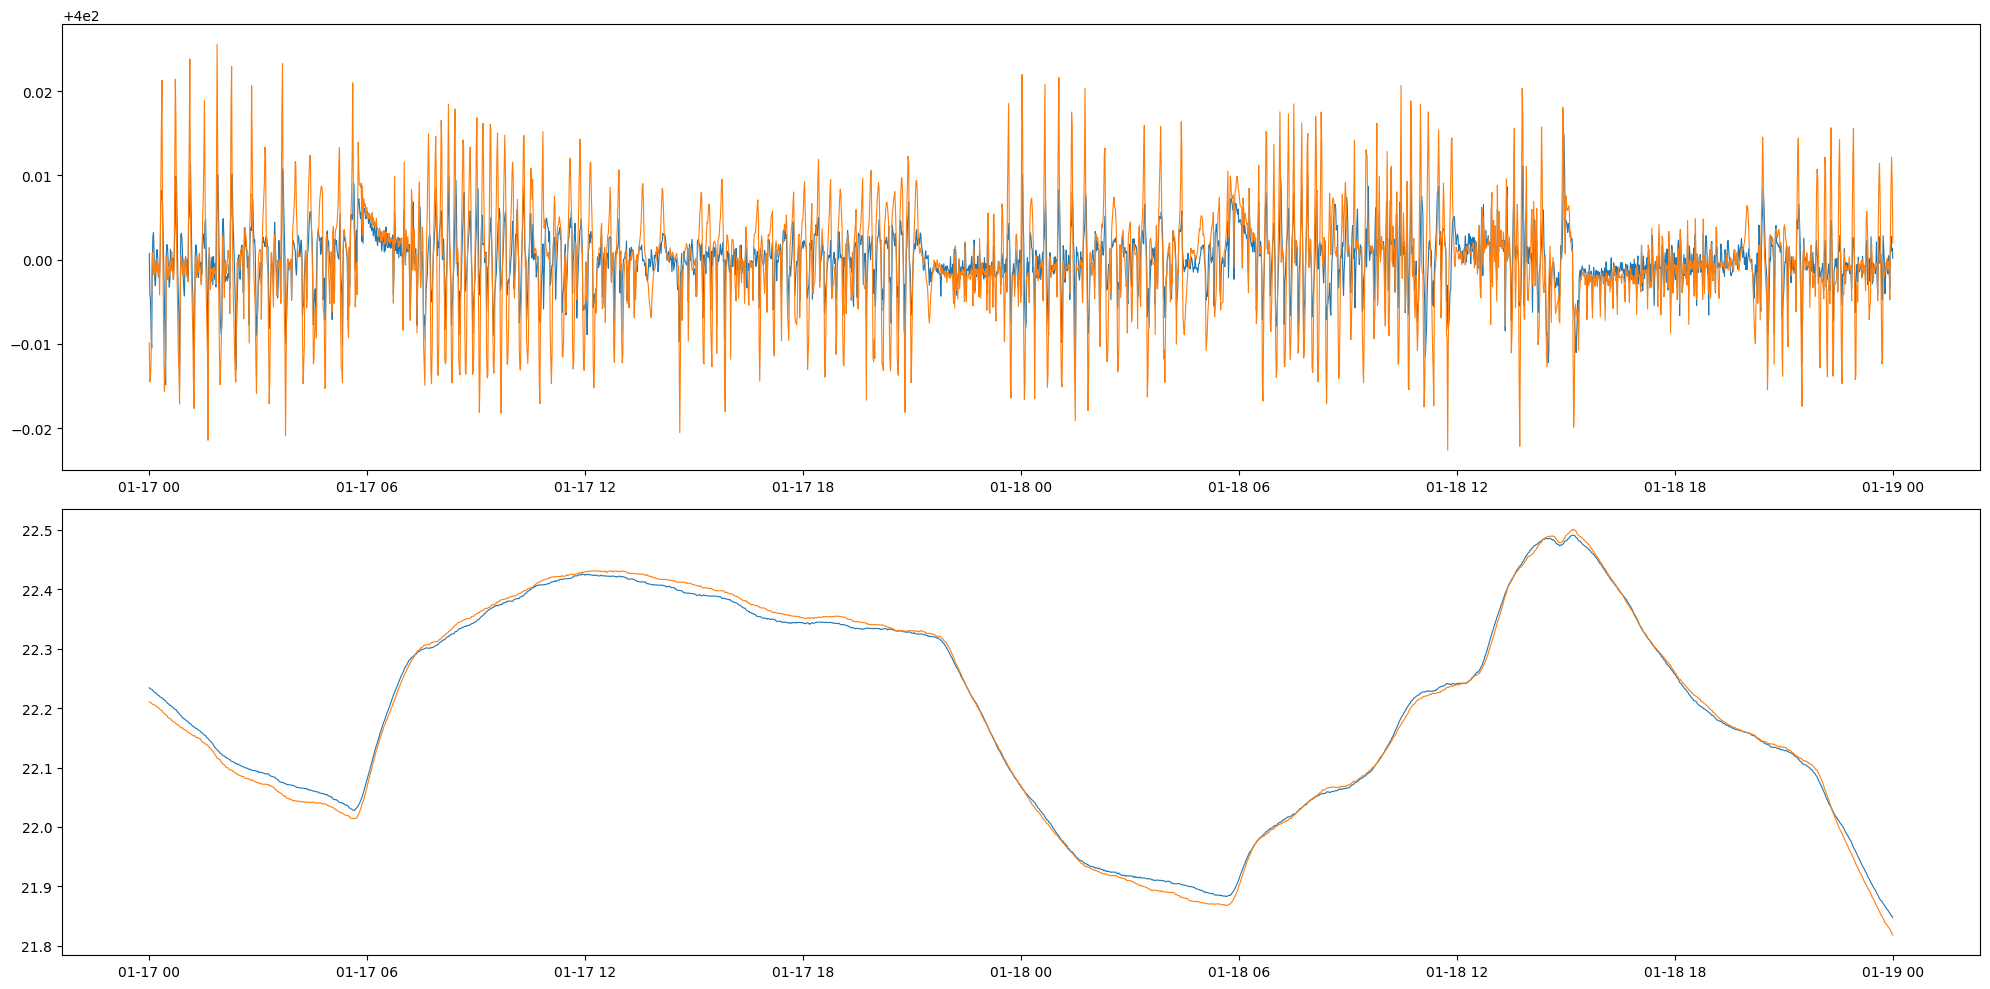

In [17]:
import matplotlib.pyplot as plt

nrows = 2
fig, ax = plt.subplots(nrows, 1, figsize=(20, nrows * 5))

ax[0].plot(frame["_time"], frame["pressure_1"], '-', lw=0.8)
ax[0].plot(frame["_time"], frame["pressure_2"], '-', lw=0.8)

ax[1].plot(frame["_time"], frame["temperature_1"], '-', lw=0.8)
ax[1].plot(frame["_time"], frame["temperature_2"], '-', lw=0.8)

plt.tight_layout()
plt.show()

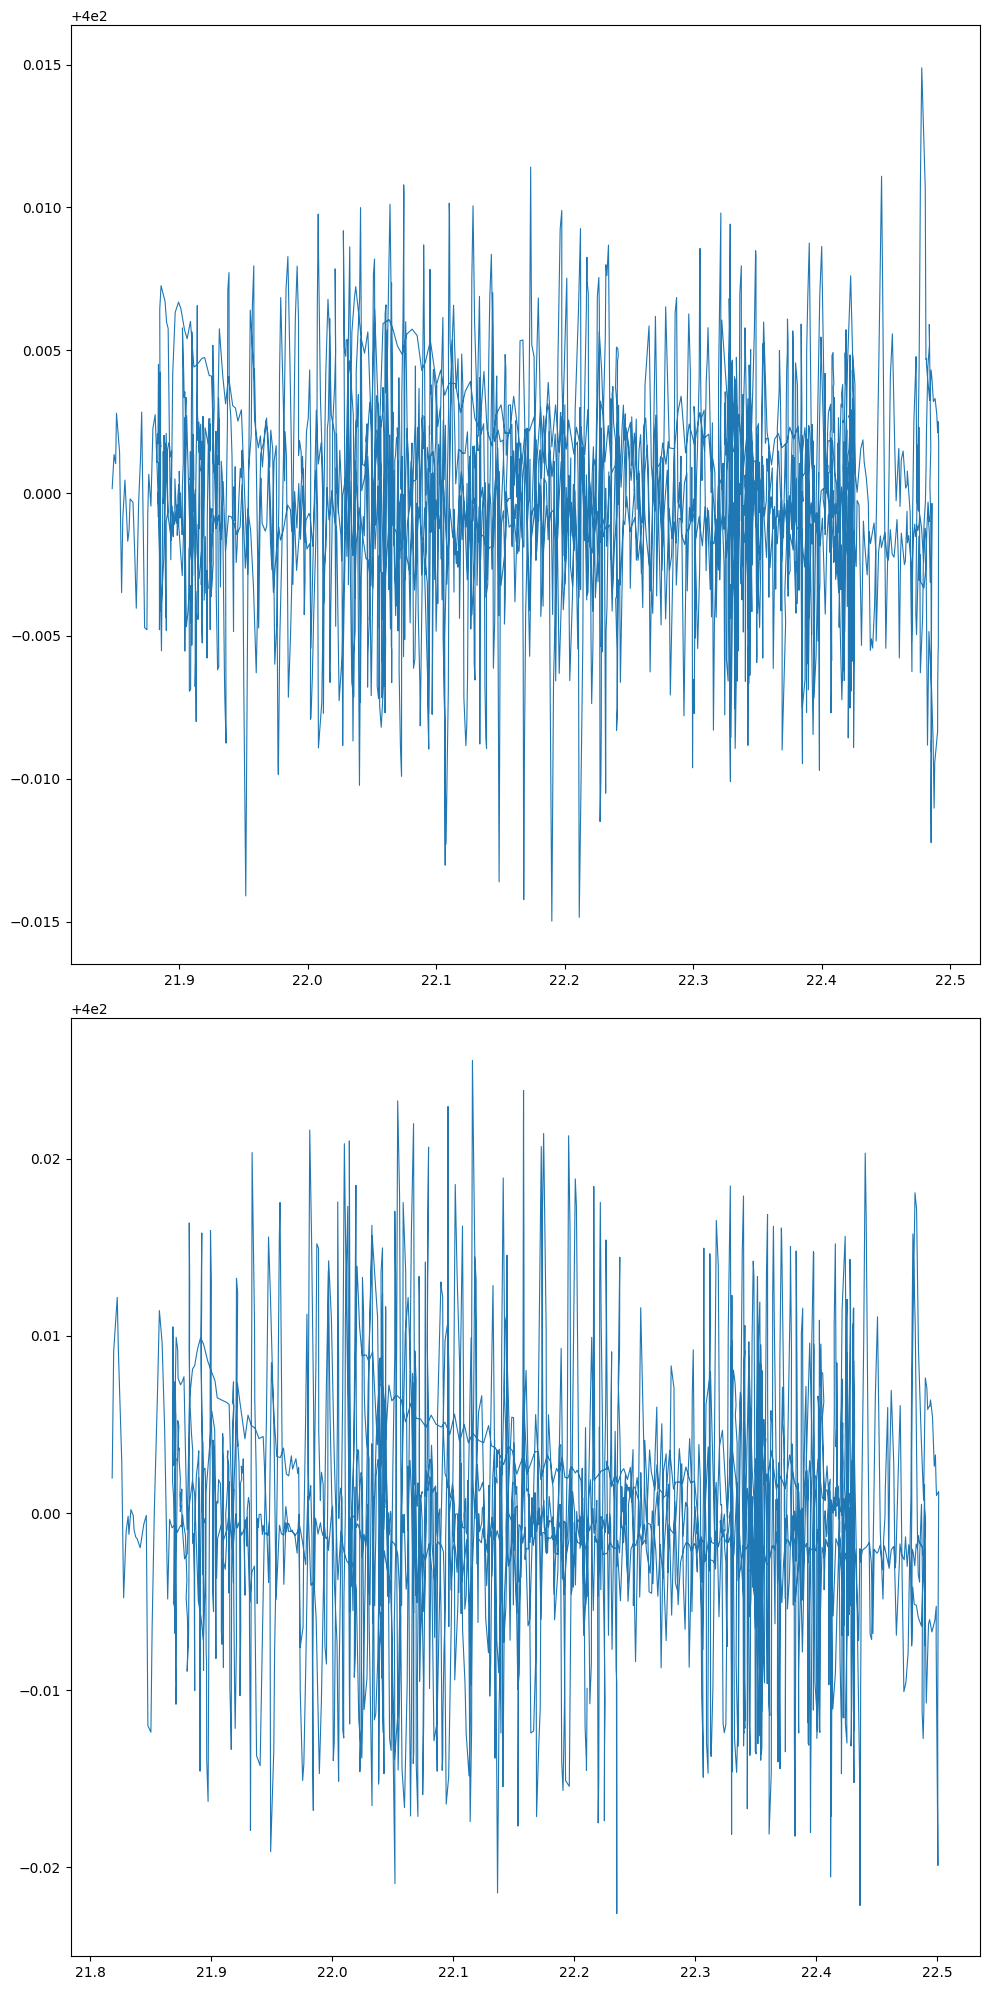

In [20]:
import matplotlib.pyplot as plt

nrows = 2
fig, ax = plt.subplots(nrows, 1, figsize=(10, nrows * 10))

ax[0].plot(frame["temperature_1"], frame["pressure_1"], '-', lw=0.8)
ax[1].plot(frame["temperature_2"], frame["pressure_2"], '-', lw=0.8)

plt.tight_layout()
plt.show()